In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load dataset
df = pd.read_csv('C:\\Users\ASUS TUF\\Documents\\PG191\\data\\raw\\PRSA_Data_Dongsi_20130301-20170228.csv')


In [5]:
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64


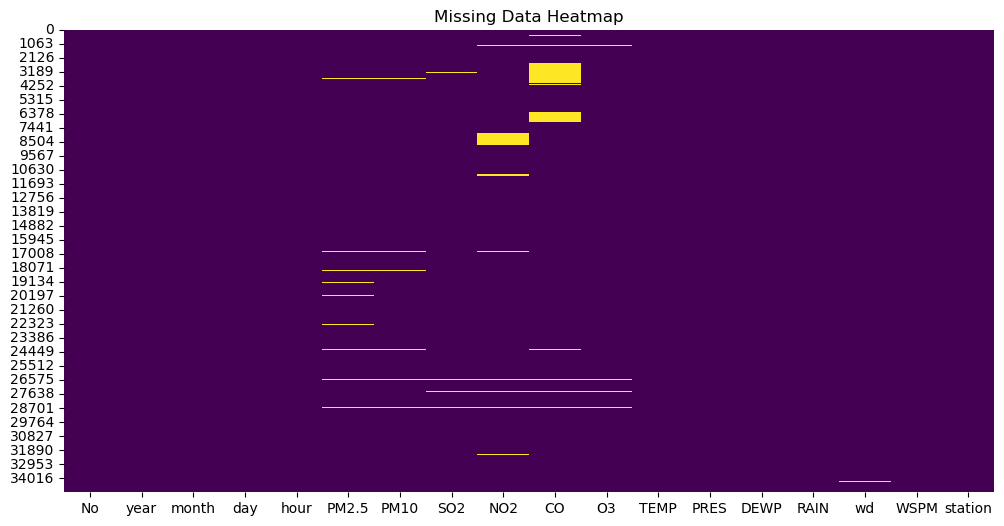

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
os.makedirs('../results/eda_visualizations', exist_ok=True)
plt.savefig('../results/eda_visualizations/missing_data_heatmap.png')
plt.show()
plt.close()

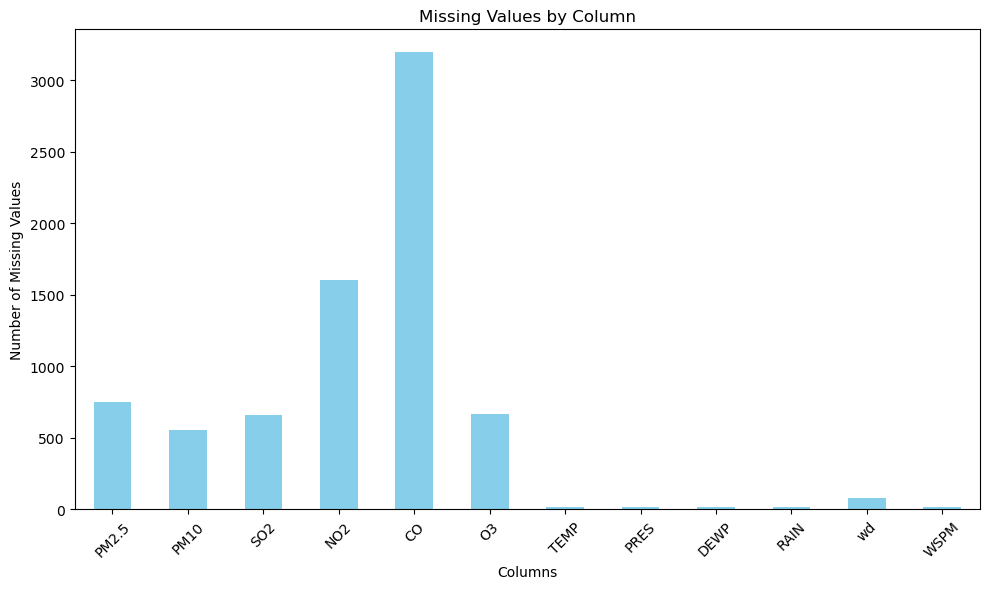

In [8]:
missing_counts = missing_counts[missing_counts > 0]  # Just show columns with missing
if not missing_counts.empty:
    plt.figure(figsize=(10,6))
    missing_counts.plot(kind='bar', color='skyblue')
    plt.title("Missing Values by Column")
    plt.xlabel("Columns")
    plt.ylabel("Number of Missing Values")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('../results/eda_visualizations/missing_data_barchart.png')
    plt.show()
    plt.close()

In [9]:
# Technique: fill numeric with median
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
print("\nMissing values after filling:")
print(df[num_cols].isnull().sum())


Missing values after filling:
No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64


In [10]:
os.makedirs('../results/outputs', exist_ok=True)
df.to_csv('../results/outputs/handled_missing_data.csv', index=False)  #save to path